In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
housing
#housing.frame.head()
housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
X, T = housing.data, housing.target


df_X = pd.DataFrame(X)
df_X.columns = ['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

df_T = pd.DataFrame(T)
df_T.columns = ['MedHouseVal']



df_X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [4]:
df_housing = pd.concat([df_X, df_T], axis=1)
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

from scipy.special import expit as logistic

RANDOM_SEED = 58

print(f"Runing on PyMC3 v{pm.__version__}")


Runing on PyMC3 v3.11.5


In [6]:
df_housing


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
az.style.use("arviz-darkgrid")


def standardize(series):
    """Standardize a pandas series"""
    return (series - series.mean()) / series.std()

In [8]:
df = df_housing.iloc[:100]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
95,2.0096,36.0,2.294016,1.066294,3469.0,1.493328,37.80,-122.26,1.300
96,2.8345,31.0,3.894915,1.127966,2048.0,1.735593,37.82,-122.26,1.838
97,2.0062,29.0,3.681319,1.175824,202.0,2.219780,37.81,-122.26,1.250
98,1.2185,22.0,2.945600,1.016000,2024.0,1.619200,37.82,-122.26,1.700


In [9]:
N = 100

true_a, true_b, true_c, predictor = df.HouseAge,df.AveRooms, df.AveOccup, df.MedHouseVal
true_mu = true_a + true_b + true_c * predictor
true_sd = 2.0

outcome = np.random.normal(loc=true_mu, scale=true_sd, size=N)

f"{predictor.mean():.2f}, {predictor.std():.2f}, {outcome.mean():.2f}, {outcome.std():.2f}"

'1.52, 0.80, 52.68, 13.41'

In [10]:
outcome

array([60.82617061, 35.44412769, 74.14308215, 66.93253625, 64.22604633,
       61.63846229, 63.56151257, 58.73816073, 51.49395259, 68.17298059,
       63.829887  , 61.20248683, 63.13223469, 56.69987634, 60.09737643,
       57.50901549, 59.2108611 , 60.36840741, 59.50453028, 63.27180007,
       47.18080877, 48.000954  , 56.66236222, 61.58774264, 63.48489781,
       50.00093884, 56.91730275, 58.86190698, 58.65122142, 62.13828347,
       57.98702893, 60.65735668, 59.66869693, 56.66207842, 55.45398504,
       56.54222709, 55.39023922, 59.67502396, 62.16649889, 55.66041585,
       59.10816345, 60.32696869, 56.6781826 , 58.00317659, 60.1877906 ,
       63.04671577, 55.67445896, 51.13362265, 48.7407236 , 41.03293031,
       24.14835109, 51.71389842, 43.77491662, 57.63372393, 59.919182  ,
       59.80158398, 59.89740131, 61.2234595 , 64.07290859,  5.37482815,
       59.49582953, 55.98001491, 58.27204523, 64.83362481, 55.85266638,
       61.07830808, 53.2369166 , 62.12954073, 63.4494556 , 58.64

In [11]:
predictor_scaled = standardize(predictor)
outcome_scaled = standardize(outcome)

f"{predictor_scaled.mean():.2f}, {predictor_scaled.std():.2f}, {outcome_scaled.mean():.2f}, {outcome_scaled.std():.2f}"

'0.00, 1.00, -0.00, 1.00'

In [12]:
with pm.Model() as model_1:
    a = pm.Normal("a", 0.0, 10.0)
    b = pm.Normal("b", 0.0, 10.0)
    

    mu = a + b * predictor_scaled
    sd = pm.Exponential("sd", 1.0)

    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=outcome_scaled)
    prior_checks = pm.sample_prior_predictive(samples=50, random_seed=RANDOM_SEED)

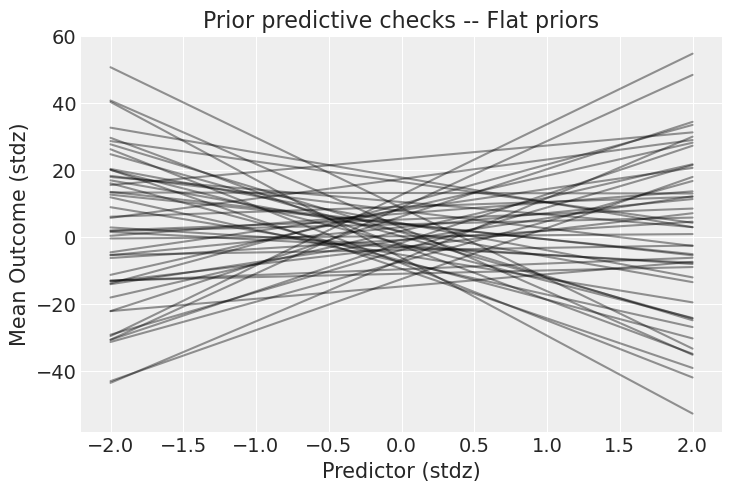

In [13]:
_, ax = plt.subplots()

x = np.linspace(-2, 2, 50)

for a, b in zip(prior_checks["a"], prior_checks["b"]):
    y = a + b  * x
    ax.plot(x, y, c="k", alpha=0.4)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Mean Outcome (stdz)")
ax.set_title("Prior predictive checks -- Flat priors");

In [14]:
with pm.Model() as model_1:
    a = pm.Normal("a", 0.0, 0.5)
    b = pm.Normal("b", 0.0, 1.0)

    mu = a + b * predictor_scaled
    sd = pm.Exponential("sd", 1.0)

    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=outcome_scaled)
    prior_checks = pm.sample_prior_predictive(samples=50, random_seed=RANDOM_SEED)

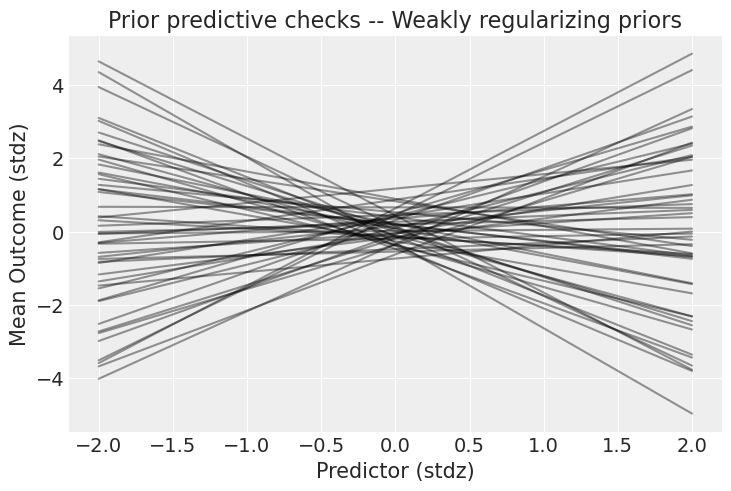

In [15]:
_, ax = plt.subplots()

x = np.linspace(-2, 2, 50)

for a, b in zip(prior_checks["a"], prior_checks["b"]):
    y = a + b * x
    ax.plot(x, y, c="k", alpha=0.4)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Mean Outcome (stdz)")
ax.set_title("Prior predictive checks -- Weakly regularizing priors");

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, b, a]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 28 seconds.


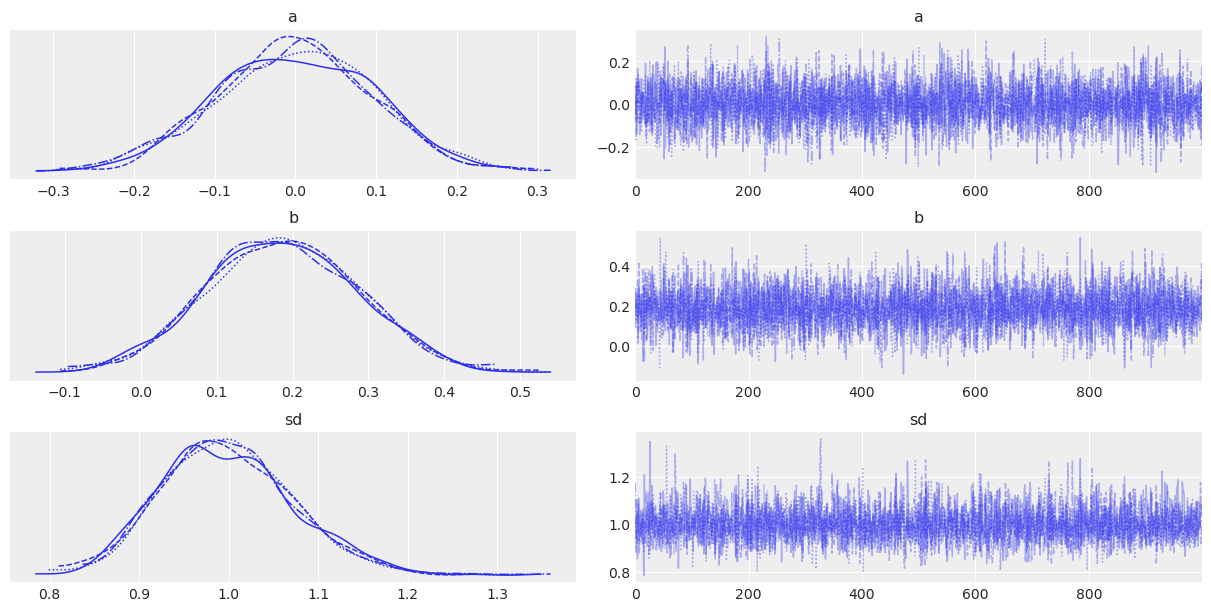

In [16]:
with model_1:
    trace_1 = pm.sample(1000, tune=2000, random_seed=RANDOM_SEED, return_inferencedata=True)
az.plot_trace(trace_1);

In [17]:
with model_1:
    ppc = pm.sample_posterior_predictive(
        trace_1, var_names=["a", "b", "obs"], random_seed=RANDOM_SEED
    )

In [18]:
ppc["obs"].shape

(4000, 100)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


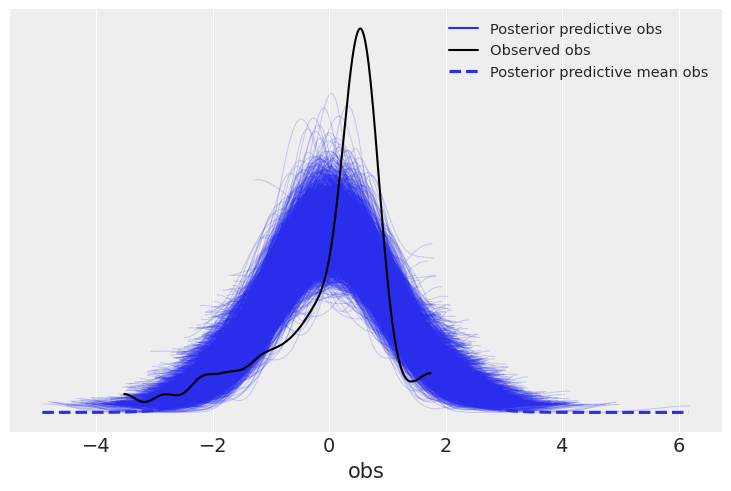

In [19]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model_1));


<ipython-input-20-d91aaefa90fc>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mu_pp = (ppc["a"] + ppc["b"] * predictor_scaled[:, None]).T
C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


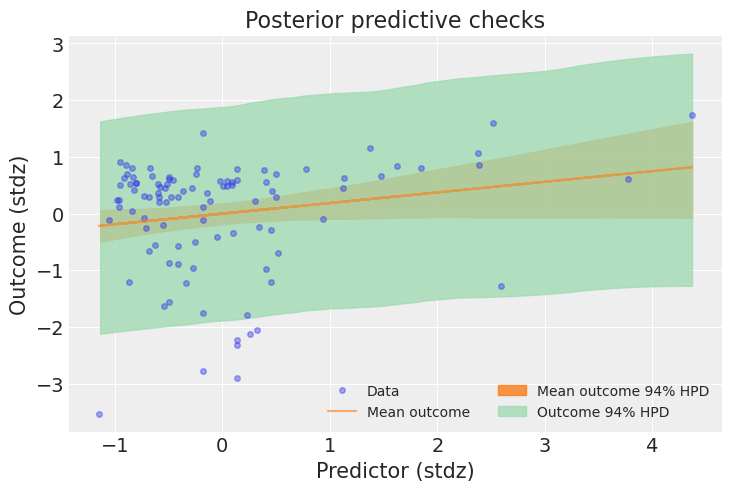

In [20]:
mu_pp = (ppc["a"] + ppc["b"] * predictor_scaled[:, None]).T

_, ax = plt.subplots()

ax.plot(predictor_scaled, outcome_scaled, "o", ms=4, alpha=0.4, label="Data")
ax.plot(predictor_scaled, mu_pp.mean(0), label="Mean outcome", alpha=0.6)
az.plot_hpd(
    predictor_scaled,
    mu_pp,
    ax=ax,
    fill_kwargs={"alpha": 0.8, "label": "Mean outcome 94% HPD"},
)
az.plot_hpd(
    predictor_scaled,
    ppc["obs"],
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "#a1dab4", "label": "Outcome 94% HPD"},
)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Outcome (stdz)")
ax.set_title("Posterior predictive checks")
ax.legend(ncol=2, fontsize=10);

In [21]:
df = df_housing.iloc[:400]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
395,1.7375,37.0,3.312771,1.006494,2556.0,2.766234,37.88,-122.34,3.500
396,3.1795,52.0,4.556034,1.002874,1498.0,2.152299,37.89,-122.29,2.182
397,3.8672,50.0,5.334802,1.149780,523.0,2.303965,37.88,-122.29,2.167
398,5.1675,52.0,6.398693,1.143791,374.0,2.444444,37.89,-122.29,2.706


In [26]:
N = 400
true_intercept = 0.2
true_slope = 1.0
predictors = df['MedHouseVal']
true_p = logistic(true_intercept + true_slope * predictors)

outcomes = np.random.binomial(1, true_p)
outcomes[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [27]:
with pm.Model() as model_2:
    betas = pm.Normal("betas", mu=0.0, sigma=np.array([0.5, 1.0]), shape=2)

    # set predictors as shared variable to change them for PPCs:
    pred = pm.Data("pred", predictors)
    p = pm.Deterministic("p", pm.math.invlogit(betas[0] + betas[1] * pred))

    outcome = pm.Bernoulli("outcome", p=p, observed=outcomes)

    trace_2 = pm.sample(1000, tune=2000, random_seed=RANDOM_SEED, return_inferencedata=True)
az.summary(trace_2, var_names=["betas"], round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 28 seconds.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
betas[0],0.33,0.29,-0.25,0.87,0.01,0.01,884.46,831.88,885.50,965.01,1.0
betas[1],0.96,0.21,0.58,1.35,0.01,0.00,934.75,927.54,937.75,988.16,1.0


In [28]:
predictors_out_of_sample = np.random.normal(size=50)
outcomes_out_of_sample = np.random.binomial(
    1, logistic(true_intercept + true_slope * predictors_out_of_sample)
)

with model_2:
    # update values of predictors:
    pm.set_data({"pred": predictors_out_of_sample})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace_2, var_names=["p"], random_seed=RANDOM_SEED
    )
    model_preds = posterior_predictive["p"]

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


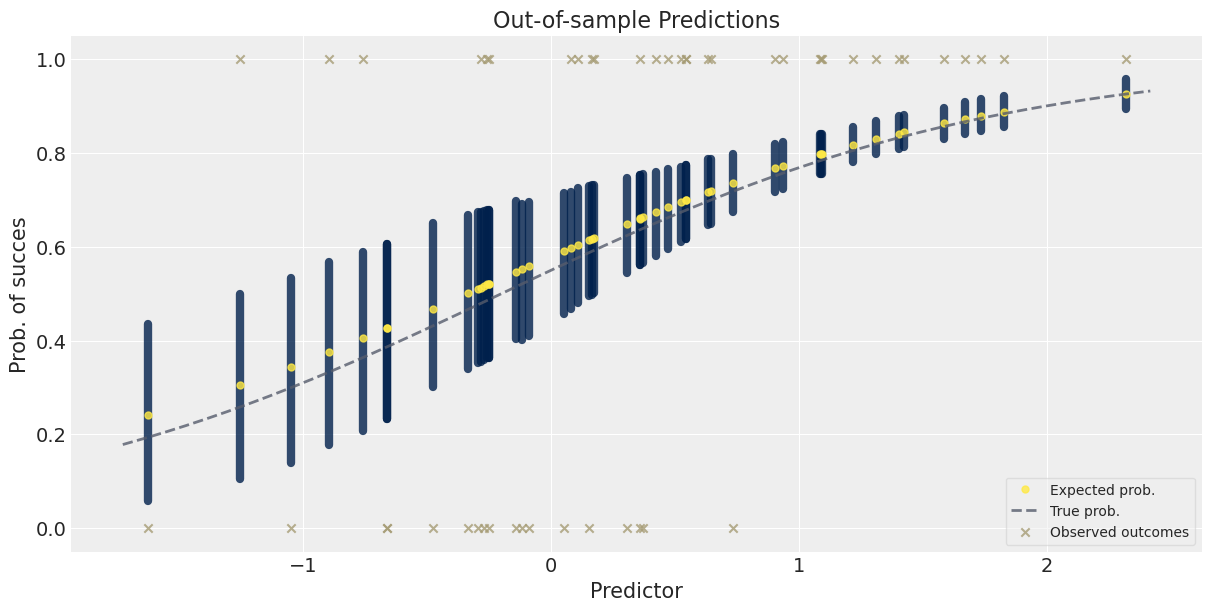

In [29]:
_, ax = plt.subplots(figsize=(12, 6))

# uncertainty about the estimates:
ax.plot(
    [predictors_out_of_sample, predictors_out_of_sample],
    az.hdi(model_preds).T,
    lw=6,
    color="#00204C",
    alpha=0.8,
)
# expected probability of success:
ax.plot(
    predictors_out_of_sample,
    model_preds.mean(0),
    "o",
    ms=5,
    color="#FFE945",
    alpha=0.8,
    label="Expected prob.",
)

# actual outcomes:
ax.scatter(
    x=predictors_out_of_sample,
    y=outcomes_out_of_sample,
    marker="x",
    color="#A69C75",
    alpha=0.8,
    label="Observed outcomes",
)

# true probabilities:
x = np.linspace(predictors_out_of_sample.min() - 0.1, predictors_out_of_sample.max() + 0.1)
ax.plot(
    x,
    logistic(true_intercept + true_slope * x),
    lw=2,
    ls="--",
    color="#565C6C",
    alpha=0.8,
    label="True prob.",
)

ax.set_xlabel("Predictor")
ax.set_ylabel("Prob. of succes")
ax.set_title("Out-of-sample Predictions")
ax.legend(fontsize=10, frameon=True, framealpha=0.5);